# Import Libraries

In [1]:
# Keras
import keras
from keras import regularizers
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential, Model, model_from_json, load_model
from keras.layers import Dense, Embedding, LSTM, Reshape, Bidirectional
from keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D, Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras.callbacks import (EarlyStopping, LearningRateScheduler,
                             ModelCheckpoint, TensorBoard, ReduceLROnPlateau)
from keras import losses, models, optimizers
from keras.activations import relu, softmax
from keras.layers import (Convolution2D, GlobalAveragePooling2D, BatchNormalization, Flatten, Dropout,
                          GlobalMaxPool2D, MaxPool2D, concatenate, Activation, Input, Dense, TimeDistributed)
from keras_self_attention import SeqSelfAttention
from tensorflow.keras.utils import to_categorical, custom_object_scope
import tensorflow as tf
from tensorflow.keras import layers

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from tqdm import tqdm, tqdm_pandas
import scipy
from scipy.stats import skew
import librosa
import librosa.display
import json
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import pandas as pd
import seaborn as sns
import glob 
import os
import sys
import pickle
import IPython.display as ipd  # To play sound in the notebook
import warnings
#!pip install keras_self_attention

# ignore warnings 
if not sys.warnoptions:
    warnings.simplefilter("ignore")
    
print("Executed")

Executed


In [2]:
#save path of dataset in to a variable
Ravdess = os.path.join(os.getcwd(),"Audio_Speech_Actors_01-24")
Savee = os.path.join(os.getcwd(),"ALL")
Tess = os.path.join(os.getcwd(),"TESS2")

print(Ravdess)
print(Savee)
print(Tess)
print("Executed Successfully")

C:\Users\Jagjeet\AppML\Major Project Final\Pro_1.91_attention_3_Models_with_Aug\Audio_Speech_Actors_01-24
C:\Users\Jagjeet\AppML\Major Project Final\Pro_1.91_attention_3_Models_with_Aug\ALL
C:\Users\Jagjeet\AppML\Major Project Final\Pro_1.91_attention_3_Models_with_Aug\TESS2
Executed Successfully


In [3]:
#Get the RAVDESS into Dataframe, changing the numbers into emotion and associateing with Corresponding datapath
ravdess_directory_list = os.listdir(Ravdess)
file_emotion = []
file_path = []
source = []
for dir in ravdess_directory_list:
    actor = os.listdir(Ravdess + '/'+ dir)
    for file in actor:
        part = file.split('.')[0]
        part = part.split('-')
        file_emotion.append(int(part[2]))
        file_path.append(Ravdess + '/' + dir + '/' + file)
        source.append('RAVDE')
emotion_df = pd.DataFrame(file_emotion, columns=['label'])
path_df = pd.DataFrame(file_path, columns=['path'])
source = pd.DataFrame(source, columns=['source'])
# contaenate the emotions and associated paths
Ravdess_df = pd.concat([emotion_df, source, path_df], axis=1)
# Dinak RAVDESS changing Numbers into emotions as per file system for same
Ravdess_df.label.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'}, inplace=True)
Ravdess_df.head()


,label,source,path
0,neutral,RAVDE,C:\Users\Jagjeet\AppML\Major Project Final\Pro...
1,neutral,RAVDE,C:\Users\Jagjeet\AppML\Major Project Final\Pro...
2,neutral,RAVDE,C:\Users\Jagjeet\AppML\Major Project Final\Pro...
3,neutral,RAVDE,C:\Users\Jagjeet\AppML\Major Project Final\Pro...
4,calm,RAVDE,C:\Users\Jagjeet\AppML\Major Project Final\Pro...


In [4]:
#Tess Dataset in to Data frame
tess_directory_list = os.listdir(Tess)
file_emotion = []
file_path = []
source = []
for dir in tess_directory_list:
    directories = os.listdir(Tess +'/'+ dir)
    for file in directories:
        part = file.split('.')[0]
        part = part.split('_')[2]
        if part=='ps':
            file_emotion.append('surprise')
            # changing pleasant surprise into Surprise
        else:
            file_emotion.append(part)
        file_path.append(Tess + '/'+ dir + '/' + file)
        source.append('TESS')   
emotion_df = pd.DataFrame(file_emotion, columns=['label'])
path_df = pd.DataFrame(file_path, columns=['path'])
source_df = pd.DataFrame(source, columns=['source'])
#Final TESS Data frame
Tess_df = pd.concat([emotion_df, source_df, path_df], axis=1)
Tess_df.head()

,label,source,path
0,angry,TESS,C:\Users\Jagjeet\AppML\Major Project Final\Pro...
1,angry,TESS,C:\Users\Jagjeet\AppML\Major Project Final\Pro...
2,angry,TESS,C:\Users\Jagjeet\AppML\Major Project Final\Pro...
3,angry,TESS,C:\Users\Jagjeet\AppML\Major Project Final\Pro...
4,angry,TESS,C:\Users\Jagjeet\AppML\Major Project Final\Pro...


In [5]:
#SAVEE DATA into Dataframe
savee_directory_list = os.listdir(Savee)
file_emotion = []
file_path = []
source = []
for file in savee_directory_list:
    file_path.append(Savee + '/' + file)
    part = file.split('_')[1]
    ele = part[:-6]
    if ele=='a':
        file_emotion.append('angry')
    elif ele=='d':
        file_emotion.append('disgust')
    elif ele=='f':
        file_emotion.append('fear')
    elif ele=='h':
        file_emotion.append('happy')
    elif ele=='n':
        file_emotion.append('neutral')
    elif ele=='sa':
        file_emotion.append('sad')
    else:
        file_emotion.append('surprise')
    source.append('SAVEE')

emotion_df = pd.DataFrame(file_emotion, columns=['label'])
path_df = pd.DataFrame(file_path, columns=['path'])
source_df = pd.DataFrame(source, columns=['source'])
# Final SAVEE Data Frame
Savee_df = pd.concat([emotion_df, source_df, path_df], axis=1)
Savee_df.head()


,label,source,path
0,angry,SAVEE,C:\Users\Jagjeet\AppML\Major Project Final\Pro...
1,angry,SAVEE,C:\Users\Jagjeet\AppML\Major Project Final\Pro...
2,angry,SAVEE,C:\Users\Jagjeet\AppML\Major Project Final\Pro...
3,angry,SAVEE,C:\Users\Jagjeet\AppML\Major Project Final\Pro...
4,angry,SAVEE,C:\Users\Jagjeet\AppML\Major Project Final\Pro...


In [6]:
# Customized dataset by combining all above
data_path = pd.concat([Ravdess_df, Tess_df, Savee_df], axis = 0, ignore_index = True)
data_path.to_csv("data_path.csv",index=True)
ref = data_path.copy()
ref

print("Successfully concatenated and CSV created")

Successfully concatenated and CSV created


# Functions for Data Augmentation

In [7]:
def noise(data):
    noise_amp = 0.05*np.random.uniform()*np.amax(data)   # more noise reduce the value to 0.5
    data = data.astype('float64') + noise_amp * np.random.normal(size=data.shape[0])
    return data
# White noise addtion
    

def speedNpitch(data):
    length_change = np.random.uniform(low=0.8, high = 1)
    speed_fac = 1.2  / length_change
    tmp = np.interp(np.arange(0,len(data),speed_fac),np.arange(0,len(data)),data)
    minlen = min(data.shape[0], tmp.shape[0])
    data *= 0
    data[0:minlen] = tmp[0:minlen]
    return data

print("Augmentation function created successfully")

Augmentation function created successfully


# Data Preparation

In [8]:
# As per 2D we need data in Matrix format
def CNN_2D_prepare_data(df, n, aug, mfcc):
    
    X = np.empty(shape=(df.shape[0], n, 216, 1))
    input_length = sampling_rate * audio_duration
    
    cnt = 0
    for fname in tqdm(df.path):
        file_path = fname
        data, _ = librosa.load(file_path, sr=sampling_rate
                               ,res_type="kaiser_fast"
                               ,duration=2.5
                               ,offset=0.5
                              )

        # Random offset / Padding
        if len(data) > input_length:
            max_offset = len(data) - input_length
            offset = np.random.randint(max_offset)
            data = data[offset:(input_length+offset)]
        else:
            if input_length > len(data):
                max_offset = input_length - len(data)
                offset = np.random.randint(max_offset)
            else:
                offset = 0
            data = np.pad(data, (offset, int(input_length) - len(data) - offset), "constant")

        # Augmentation? 
        if aug == 1:
            data = speedNpitch(data)
        if mfcc == 1:
            # MFCC extraction 
            MFCC = librosa.feature.mfcc(data, sr=sampling_rate, n_mfcc=n_mfcc)
            MFCC = np.expand_dims(MFCC, axis=-1)
            X[cnt,] = MFCC
            
        else:
            # Log-melspectogram
            melspec = librosa.feature.melspectrogram(data, n_mels = n_melspec)   
            logspec = librosa.amplitude_to_db(melspec)
            logspec = np.expand_dims(logspec, axis=-1)
            X[cnt,] = logspec
            
        cnt += 1
    
    return X

def CNN_2D_prepare_data2(df, n, aug, mfcc):
    
    X = np.empty(shape=(df.shape[0], n, 216, 1))
    input_length = sampling_rate * audio_duration
    
    cnt = 0
    for fname in tqdm(df.path):
        file_path = fname
        data, _ = librosa.load(file_path, sr=sampling_rate
                               ,res_type="kaiser_fast"
                               ,duration=2.5
                               ,offset=0.5
                              )

        # Random offset / Padding
        if len(data) > input_length:
            max_offset = len(data) - input_length
            offset = np.random.randint(max_offset)
            data = data[offset:(input_length+offset)]
        else:
            if input_length > len(data):
                max_offset = input_length - len(data)
                offset = np.random.randint(max_offset)
            else:
                offset = 0
            data = np.pad(data, (offset, int(input_length) - len(data) - offset), "constant")

        # Augmentation? 
        if aug == 1:
            data = noise(data)
        
        # which feature?
        if mfcc == 1:
            # MFCC extraction 
            MFCC = librosa.feature.mfcc(data, sr=sampling_rate, n_mfcc=n_mfcc)
            MFCC = np.expand_dims(MFCC, axis=-1)
            X[cnt,] = MFCC
            
        else:
            # Log-melspectogram
            melspec = librosa.feature.melspectrogram(data, n_mels = n_melspec)   
            logspec = librosa.amplitude_to_db(melspec)
            logspec = np.expand_dims(logspec, axis=-1)
            X[cnt,] = logspec
            
        cnt += 1
    
    return X
print("Functions for extraction created successfully")

Functions for extraction created successfully


In [9]:
#Funtions for Data Normalization and in to feedable format for keras
def data_normalization(X_train, X_test, X_val):
    mean = np.mean(X_train, axis=0)
    std = np.std(X_train, axis=0)

    X_train_norm = (X_train - mean)/std
    X_test_norm = (X_test - mean)/std
    X_val_norm = (X_val - mean)/std
    
    return X_train_norm, X_test_norm, X_val_norm

def np_array_conversation(X_train, y_train, X_test, y_test, X_val, y_val):
    X_train = np.array(X_train)
    y_train = np.array(y_train)
    X_test = np.array(X_test)
    y_test = np.array(y_test)
    X_val = np.array(X_val)
    y_val = np.array(y_val)
    
    return X_train, y_train, X_test, y_test, X_val, y_val

print("Function created")


Function created


# Function Related To Results

In [10]:
def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    
    df_cm = pd.DataFrame(confusion_matrix, index=class_names, columns=class_names)
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt='.2%')

    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")

    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
class get_results:

    def __init__(self, model_history, model ,X_test_norm, y_test_cat, labels):
        self.model_history = model_history
        self.model = model
        self.X_test_norm = X_test_norm
        self.y_test_cat = y_test_cat             
        self.labels = labels

    def create_plot(self, model_history):
        plt.plot(model_history.history['loss'])
        plt.plot(model_history.history['val_loss'])
        plt.title('model loss')
        plt.ylabel('loss')
        plt.xlabel('epoch')
        plt.legend(['train', 'test'], loc='upper left')
        plt.show()
        
        plt.plot(model_history.history['acc'])
        plt.plot(model_history.history['val_acc'])
        plt.title('model accuracy')
        plt.ylabel('accuracy')
        plt.xlabel('epoch')
        plt.legend(['train', 'test'], loc='upper left')
        plt.show()


    def create_results(self, model):
        '''predict on test set and get accuracy results'''
        opt = tf.keras.optimizers.SGD(learning_rate=0.0001, decay=1e-6, momentum=0.9, nesterov=True)
        model.compile(optimizer=opt, loss=losses.categorical_crossentropy, metrics=['acc'])
        test_loss, test_acc = model.evaluate(X_test_norm, y_test_cat, verbose=0)
        print("Test Accuracy: ",test_acc)
        print("Test loss: ",test_loss) 
        score = model.evaluate(X_test_norm, y_test_cat, verbose=1)
        print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))
            

    def confusion_results(self, X_test_norm, y_test_cat, labels, model):
        preds = model.predict(X_test_norm, 
                              batch_size=16, 
                              verbose=1)
        preds=preds.argmax(axis=1)
        preds = preds.astype(int).flatten()
        preds = (lb.inverse_transform((preds)))
        preds = pd.DataFrame({'predictedvalues': preds})# new temp code
        
        actual = y_test_cat.argmax(axis=1)
        actual = actual.astype(int).flatten()
        actual = (lb.inverse_transform((actual)))
        actual = pd.DataFrame({'actualvalues': actual}) ## new temp code
        
        finaldf = actual.join(preds)
        print(finaldf[170:180])     

        finaldf.to_csv('Predictions.csv', index=False)
        print(finaldf.groupby('predictedvalues').count())
        
        classes = labels
        classes.sort()    
        cm = confusion_matrix(actual, preds)
        cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print_confusion_matrix(cmn, class_names = classes)

        return finaldf
    
print("Result functions created")    

Result functions created


# Dataset Visualization

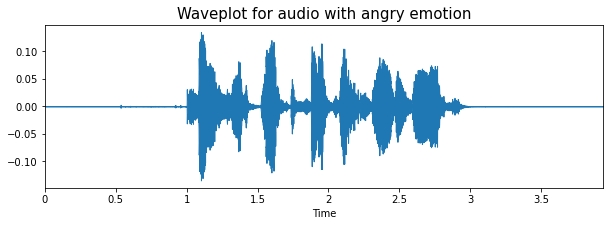

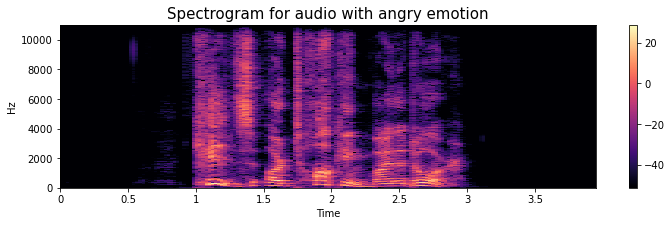

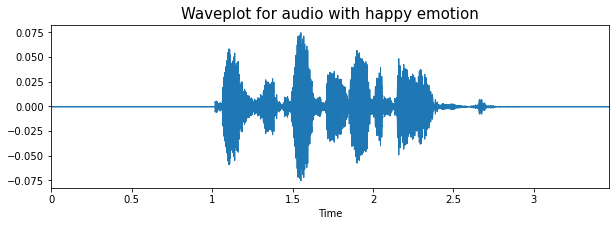

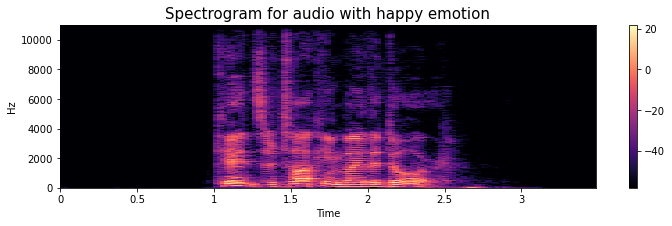

In [11]:
def create_waveplot(data, sr, e):
    plt.figure(figsize=(10, 3))
    plt.title('Waveplot for audio with {} emotion'.format(e), size=15)
    librosa.display.waveplot(data, sr=sr)
    plt.show()

def create_spectrogram(data, sr, e):
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(12, 3))
    plt.title('Spectrogram for audio with {} emotion'.format(e), size=15)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')   
    plt.colorbar()

emotion='angry'
path = np.array(ref.path[data_path.label==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)

emotion='happy'
path = np.array(ref.path[data_path.label==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)

# 2D CNN MFCC with Augmentation

In [12]:
sampling_rate=44100
audio_duration=2.5
n_mfcc = 30
aug = 0
mfcc = CNN_2D_prepare_data(ref, n_mfcc, aug, mfcc = 1)    # mfcc = 0  means MFCC conversion will be used

100%|██████████| 4720/4720 [05:18<00:00, 14.84it/s]


In [13]:
sampling_rate=44100
audio_duration=2.5
n_mfcc = 30
mfcc_aug = CNN_2D_prepare_data(ref, n = n_mfcc, aug = 1, mfcc = 1)
mfcc_aug = np.append(mfcc_aug, mfcc, axis=0)
label1 = pd.DataFrame(ref.label)
label2 = pd.DataFrame(ref.label)
result = label1.append(label2,sort=True)
result = result.reset_index()
result = result.drop(['index'], axis=1)
mfcc_aug2 = CNN_2D_prepare_data2(ref, n = n_mfcc, aug = 1, mfcc = 1)
mfcc_aug2 = np.append(mfcc_aug2, mfcc_aug, axis=0)
label2 = pd.DataFrame(ref.label)
result2 = result.append(label2,sort=True)
result2 = result2.reset_index()
result2 = result2.drop(['index'], axis=1)

100%|██████████| 4720/4720 [06:13<00:00, 12.65it/s]


In [14]:
# Split between train and test 
X_train, X_test, y_train, y_test = train_test_split(mfcc_aug2
                                                    , result2
                                                    , test_size=0.25
                                                    , shuffle=True
                                                    , random_state=42
                                                   )

X_train, X_val, y_train, y_val = train_test_split(X_train
                                                  , y_train
                                                  , test_size=0.25
                                                  , shuffle=True
                                                  , random_state=42
                                                 )

# 2D CNN Model

(7965, 30, 216, 1)
['angry' 'calm' 'disgust' 'fear' 'happy' 'neutral' 'sad' 'surprise']
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 30, 216, 1)]      0         
_________________________________________________________________
conv2d (Conv2D)              (None, 30, 216, 64)       640       
_________________________________________________________________
batch_normalization (BatchNo (None, 30, 216, 64)       256       
_________________________________________________________________
activation (Activation)      (None, 30, 216, 64)       0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 108, 64)       0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 108, 64)       0         
________________________________

249/249 [==============================] - 919s 4s/step - loss: 0.6053 - acc: 0.7857 - val_loss: 0.6620 - val_acc: 0.7766
Epoch 14/40
249/249 [==============================] - ETA: 0s - loss: 0.5701 - acc: 0.8003
Epoch 00014: val_acc improved from 0.77665 to 0.80377, saving model to C:\Users\Jagjeet\AppML\Major Project Final\Pro_1.91_attention_3_Models_with_Aug\saved_models\best_model.h5
249/249 [==============================] - 922s 4s/step - loss: 0.5701 - acc: 0.8003 - val_loss: 0.5906 - val_acc: 0.8038
Epoch 15/40
249/249 [==============================] - ETA: 0s - loss: 0.5364 - acc: 0.8127
Epoch 00015: val_acc did not improve from 0.80377
249/249 [==============================] - 922s 4s/step - loss: 0.5364 - acc: 0.8127 - val_loss: 0.6118 - val_acc: 0.7951
Epoch 16/40
249/249 [==============================] - ETA: 0s - loss: 0.5229 - acc: 0.8215
Epoch 00016: val_acc did not improve from 0.80377
249/249 [==============================] - 948s 4s/step - loss: 0.5229 - acc: 0.

Epoch 38/40
249/249 [==============================] - ETA: 0s - loss: 0.1760 - acc: 0.9433
Epoch 00038: val_acc improved from 0.85838 to 0.86516, saving model to C:\Users\Jagjeet\AppML\Major Project Final\Pro_1.91_attention_3_Models_with_Aug\saved_models\best_model.h5
249/249 [==============================] - 603s 2s/step - loss: 0.1760 - acc: 0.9433 - val_loss: 0.3997 - val_acc: 0.8652
Epoch 39/40
249/249 [==============================] - ETA: 0s - loss: 0.1650 - acc: 0.9490
Epoch 00039: val_acc did not improve from 0.86516
249/249 [==============================] - 600s 2s/step - loss: 0.1650 - acc: 0.9490 - val_loss: 0.4307 - val_acc: 0.8614
Epoch 40/40
249/249 [==============================] - ETA: 0s - loss: 0.1581 - acc: 0.9507
Epoch 00040: val_acc did not improve from 0.86516
249/249 [==============================] - 601s 2s/step - loss: 0.1581 - acc: 0.9507 - val_loss: 0.4911 - val_acc: 0.8384


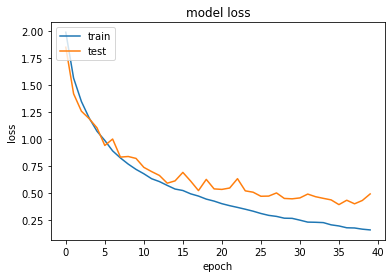

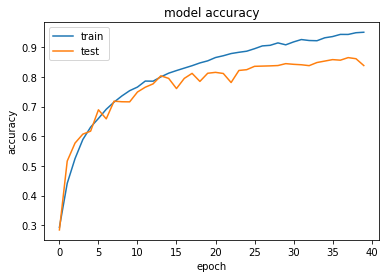

Loaded model from disk
Test Accuracy:  0.8677965998649597
Test loss:  0.39318692684173584
111/111 [==============================] - 35s 313ms/step - loss: 0.3932 - acc: 0.8678
acc: 86.78%
222/222 [==============================] - 41s 187ms/step
    actualvalues predictedvalues
170          sad             sad
171      neutral           happy
172      disgust           happy
173        happy           happy
174         fear            fear
175      disgust         neutral
176        angry           happy
177     surprise        surprise
178        happy           happy
179     surprise        surprise
                 actualvalues
predictedvalues              
angry                     472
calm                      213
disgust                   506
fear                      452
happy                     568
neutral                   436
sad                       457
surprise                  436
              precision    recall  f1-score   support

       angry       0.91      0.89  

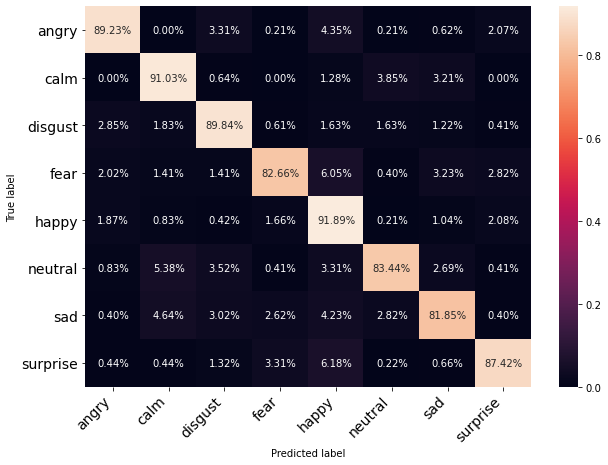

In [15]:
def get_2d_conv_model(n):
    ''' Create a standard deep 2D convolutional neural network'''
    nclass = 8
    inp = Input(shape=(n,216,1))  #2D matrix of 30 MFCC bands by 216 audio length.
    x = Convolution2D(64, (3,3), strides=(1, 1), padding="same")(inp)    #(4,10)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = MaxPool2D()(x)
    x = Dropout(rate=0.2)(x)
    
    x = Convolution2D(128, (3,3), strides=(1, 1), padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = MaxPool2D()(x)
    x = Dropout(rate=0.2)(x)
    
    x = Convolution2D(256, (3,3), strides=(1, 1), padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = MaxPool2D()(x)
    x = Dropout(rate=0.2)(x)
    
    x = Convolution2D(128, (3,3), strides=(1, 1), padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = MaxPool2D()(x)
    x = Dropout(rate=0.2)(x)
    
    x = Flatten()(x)
    
    out = Dense(nclass, activation=softmax)(x)
    model = models.Model(inputs=inp, outputs=out)
    
    opt = tf.keras.optimizers.Adam(learning_rate = 0.0001, decay=1e-6)
    model.compile(optimizer=opt, loss=losses.categorical_crossentropy, metrics=['acc'])
    return model

# Normalization as per the standard NN process
X_train_norm, X_test_norm, X_val_norm = data_normalization(X_train, X_test, X_val)

# one hot encode the target 
lb = LabelEncoder()
y_train_cat = np_utils.to_categorical(lb.fit_transform(y_train))    # for GPU
y_test_cat = np_utils.to_categorical(lb.fit_transform(y_test))      # for GPU
y_val_cat = np_utils.to_categorical(lb.fit_transform(y_val))        # for GPU

print(X_train.shape)
print(lb.classes_)

model = get_2d_conv_model(n_mfcc)
model.summary()

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=15)
model_name = 'best_model.h5'
save_dir = os.path.join(os.getcwd(), 'saved_models')
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
print('Save model and weights at %s ' % model_path)
mc = ModelCheckpoint(model_path, monitor='val_acc', mode='max', verbose=1, 
                     save_best_only=True)
model_history = model.fit(X_train_norm, y_train_cat, validation_data=(X_val_norm, y_val_cat), batch_size=32,
                          verbose = 1, epochs=40, callbacks=[es, mc])

results = get_results(model_history,model,X_test_norm,y_test_cat, ref.label.unique())
results.create_plot(model_history)

model_json = model.to_json()
with open("model_json.json", "w") as json_file:
    json_file.write(model_json)

# loading json and model architecture 
json_file = open('model_json.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
from keras.models import model_from_json
loaded_model = model_from_json(loaded_model_json, custom_objects={'SeqSelfAttention': SeqSelfAttention})

# load weights into new model
loaded_model.load_weights(model_path)#("saved_models/best_model.h5")
print("Loaded model from disk")

results.create_results(loaded_model)
finaldf = results.confusion_results(X_test_norm, y_test_cat, ref.label.unique(), loaded_model)

# Classification report 
classes = finaldf.actualvalues.unique()
classes.sort()    
print(classification_report(finaldf.actualvalues, finaldf.predictedvalues, target_names=classes))

# 2D CNN LSTM Model

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
def get_2d_conv_LSTM_model(n):
    ''' Create a standard deep 2D convolutional neural network'''
    nclass = 8
    inp = Input(shape=(n,216,1))  #2D matrix of 30 MFCC bands by 216 audio length.
    x = Convolution2D(64, (3,3), strides=(1, 1), padding="same")(inp)    #(4,10)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = MaxPool2D()(x)
    x = Dropout(rate=0.2)(x)
    
    x = Convolution2D(128, (3,3), strides=(1, 1), padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = MaxPool2D()(x)
    x = Dropout(rate=0.2)(x)
    
    x = Convolution2D(256, (3,3), strides=(1, 1), padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = MaxPool2D()(x)
    x = Dropout(rate=0.2)(x)
    
    x = Convolution2D(128, (3,3), strides=(1, 1), padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = MaxPool2D()(x)
    x = Dropout(rate=0.2)(x)
    
    x = Reshape((-1, 128))(x)
    
    #LSTM
    x = LSTM(128)(x)
    
    out = Dense(nclass, activation=softmax)(x)
    model = models.Model(inputs=inp, outputs=out)
    
    opt = tf.keras.optimizers.Adam(learning_rate = 0.0001, decay=1e-6)
    model.compile(optimizer=opt, loss=losses.categorical_crossentropy, metrics=['acc'])
    return model


# Normalization as per the standard NN process
X_train_norm, X_test_norm, X_val_norm = data_normalization(X_train, X_test, X_val)

# one hot encode the target 
lb = LabelEncoder()
y_train_cat = np_utils.to_categorical(lb.fit_transform(y_train))    # for GPU
y_test_cat = np_utils.to_categorical(lb.fit_transform(y_test))      # for GPU
y_val_cat = np_utils.to_categorical(lb.fit_transform(y_val))        # for GPU


print(X_train.shape)
print(lb.classes_)

model = get_2d_conv_LSTM_model(n_mfcc)
model.summary()

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=15)
model_name = 'best_model.h5'
save_dir = os.path.join(os.getcwd(), 'saved_models')
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
print('Save model and weights at %s ' % model_path)
mc = ModelCheckpoint(model_path, monitor='val_acc', mode='max', verbose=1, 
                     save_best_only=True)
model_history = model.fit(X_train_norm, y_train_cat, validation_data=(X_val_norm, y_val_cat), batch_size=32,
                          verbose = 1, epochs=40, callbacks=[es, mc])

results = get_results(model_history,model,X_test_norm,y_test_cat, ref.label.unique())
results.create_plot(model_history)

model_json = model.to_json()
with open("model_json.json", "w") as json_file:
    json_file.write(model_json)

# loading json and model architecture 
json_file = open('model_json.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
from keras.models import model_from_json
loaded_model = model_from_json(loaded_model_json, custom_objects={'SeqSelfAttention': SeqSelfAttention})

# load weights into new model
loaded_model.load_weights(model_path)#("saved_models/best_model.h5")
print("Loaded model from disk")

results.create_results(loaded_model)
finaldf = results.confusion_results(X_test_norm, y_test_cat, ref.label.unique(), loaded_model)

# Classification report 
classes = finaldf.actualvalues.unique()
classes.sort()    
print(classification_report(finaldf.actualvalues, finaldf.predictedvalues, target_names=classes))

# 2D CNN LSTM with Self-Attention Model

In [ ]:
def get_2d_conv_LSTM_atten_model(n):
    ''' Create a standard deep 2D convolutional neural network'''
    nclass = 8
    inp = Input(shape=(n,216,1))  #2D matrix of 30 MFCC bands by 216 audio length.
    x = Convolution2D(64, (3,3), strides=(1, 1), padding="same")(inp)    #(4,10)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = MaxPool2D()(x)
    x = Dropout(rate=0.2)(x)
    
    x = Convolution2D(128, (3,3), strides=(1, 1), padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = MaxPool2D()(x)
    x = Dropout(rate=0.2)(x)
    
    x = Convolution2D(256, (3,3), strides=(1, 1), padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = MaxPool2D()(x)
    x = Dropout(rate=0.2)(x)
    
    x = Convolution2D(128, (3,3), strides=(1, 1), padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = MaxPool2D()(x)
    x = Dropout(rate=0.2)(x)
    
    x = Reshape((-1, 128))(x)
    #LSTM
    x = LSTM(32, return_sequences=True)(x)
    x = SeqSelfAttention(attention_activation ='tanh')(x)
    x = LSTM(32, return_sequences=False)(x)
    
    
    out = Dense(nclass, activation=softmax)(x)
    model = models.Model(inputs=inp, outputs=out)
    
    opt = tf.keras.optimizers.Adam(learning_rate = 0.0001, decay=1e-6)
    model.compile(optimizer=opt, loss=losses.categorical_crossentropy, metrics=['acc'])
    return model


# Normalization as per the standard NN process
X_train_norm, X_test_norm, X_val_norm = data_normalization(X_train, X_test, X_val)

# one hot encode the target 
lb = LabelEncoder()
y_train_cat = np_utils.to_categorical(lb.fit_transform(y_train))    # for GPU
y_test_cat = np_utils.to_categorical(lb.fit_transform(y_test))      # for GPU
y_val_cat = np_utils.to_categorical(lb.fit_transform(y_val))        # for GPU


print(X_train.shape)
print(lb.classes_)

model = get_2d_conv_LSTM_atten_model(n_mfcc)
model.summary()
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=15)
model_name = 'best_model.h5'
save_dir = os.path.join(os.getcwd(), 'saved_models')
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
print('Save model and weights at %s ' % model_path)

mc = ModelCheckpoint(model_path, monitor='val_acc', mode='max', verbose=1, 
                     save_best_only=True)
model_history = model.fit(X_train_norm, y_train_cat, validation_data=(X_val_norm, y_val_cat), batch_size=16,
                          verbose = 1, epochs=40, callbacks=[es, mc])

results = get_results(model_history,model,X_test_norm,y_test_cat, ref.label.unique())
results.create_plot(model_history)

model_json = model.to_json()
with open("model_json.json", "w") as json_file:
    json_file.write(model_json)

# loading json and model architecture 
json_file = open('model_json.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
from keras.models import model_from_json
loaded_model = model_from_json(loaded_model_json, custom_objects={'SeqSelfAttention': SeqSelfAttention})

# load weights into new model
loaded_model.load_weights(model_path)#("saved_models/best_model.h5")
print("Loaded model from disk")

results.create_results(loaded_model)
finaldf = results.confusion_results(X_test_norm,y_test_cat, ref.label.unique(), loaded_model)

# Classification report 
classes = finaldf.actualvalues.unique()
classes.sort()    
print(classification_report(finaldf.actualvalues, finaldf.predictedvalues, target_names=classes))